<a href="https://colab.research.google.com/github/jeramirez169/An-lisis-exploratorio-de-datos/blob/main/Proyecto%20An%C3%A1lisis%20exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de usuarios del Sofi (BOT) que solicitarán atención humana**

*Juan Esteban Ramírez Duran*

----


## Descripción del Problema

El Bot de la Universidad ICESI es una herramienta de soporte automatizada diseñada para reducir la cantidad de consultas que requieren la intervención de un agente humano. Su objetivo es proporcionar respuestas rápidas y eficientes a preguntas frecuentes de estudiantes, docentes y personal administrativo. Sin embargo, no todas las consultas pueden resolverse a través del bot, y un porcentaje de usuarios termina solicitando asistencia humana, lo que genera carga adicional en los agentes de soporte.

Actualmente, no se cuenta con un mecanismo que permita predecir cuántos usuarios requerirán atención humana, lo que puede ocasionar falta de personal disponible en momentos de alta demanda o ineficiencia en la asignación de recursos cuando hay menos consultas de lo esperado. Esto impacta negativamente en los tiempos de respuesta, la experiencia del usuario y la efectividad del bot como herramienta de soporte.

## Justificación del Uso de Ciencia de Datos o IA

El uso de Ciencia de Datos e Inteligencia Artificial (IA) permitirá analizar datos históricos de interacciones con el bot y detectar patrones que indiquen la probabilidad de que un usuario solicite la ayuda de un agente humano. Con esta información, la universidad podrá optimizar la disponibilidad de los agentes, mejorar la capacidad de respuesta y hacer ajustes en el bot para reducir la cantidad de consultas escaladas a atención humana.

Algunas metodologías adecuadas para este análisis incluyen:

**1. Regresión Logística:** Permite predecir la probabilidad de que un usuario solicite la ayuda de un agente en función de sus interacciones con el bot.

**2. Clasificación con Machine Learning (Random Forest, SVM)**: Modelos supervisados que pueden identificar patrones en las interacciones que conducen a una solicitud de atención humana.

##  Formulación de una Pregunta SMART

¿Cuántos usuarios que interactúan con el Bot de la Universidad ICESI solicitarán ser atendidos por un agente en los próximos 30 días, considerando datos históricos de interacciones y características de la conversación?


✅ Específica: Se enfoca en predecir cuántos usuarios solicitarán atención humana después de interactuar con el bot.

✅ Medible: Se basa en datos cuantificables de interacciones previas y solicitudes de atención.

✅ Accionable: Permite ajustar la cantidad de agentes disponibles, mejorar la eficiencia del bot y reducir consultas escaladas innecesariamente.

✅ Realista: Utiliza datos históricos reales de consultas al bot, lo que hace factible su implementación.

✅ Temporal: Se establece un horizonte de 30 días, facilitando la planificación operativa.

In [61]:
#Importar la base de datos

import pandas as pd

file_url = 'https://github.com/jeramirez169/An-lisis-exploratorio-de-datos/raw/main/SofiDataset.xlsx'

df = pd.read_excel(file_url)

print(df.shape)

(107991, 25)


In [62]:
# Exploración de datos

# Concatenar los primeros y últimos 5 registros
top_bottom = pd.concat([df.head(), df.tail()])

# Mostrar la tabla resultante
top_bottom


,Id,Fecha,Canal,Condición,Media,Nombre de usuario,Email de usuario,Hash de usuario,Parámetros de usuario,Nombre de la intención,...,Host,País,Ciudad,Dispositivo,Path,Tipo de encuesta,Valor,Encuesta,Pregunta encuesta,Respuesta encuesta
0,189955949,2022-11-18 00:20:37,Web,"Web,Soy estudiante",Banner,NaN,NaN,c9d796e5189d55da017605d885c919b8,"{""id"":""c9d796e5189d55da017605d885c919b8"",""name...",Soy estudiante,...,banner9.icesi.edu.co,Colombia,Bogota,Phone,/web/icesi/alumnos,NaN,NaN,NaN,NaN,NaN
1,189955949,2022-11-18 00:21:07,Web,"Web,Soy estudiante",Banner,NaN,NaN,c9d796e5189d55da017605d885c919b8,"{""id"":""c9d796e5189d55da017605d885c919b8"",""name...",Usuarío único,...,banner9.icesi.edu.co,Colombia,Bogota,Phone,/web/icesi/alumnos,NaN,NaN,NaN,NaN,NaN
2,189957370,2022-11-18 02:04:16,Web,"Web,Soy estudiante",Banner,NaN,NaN,20e6c71c76244cd208a9e9a2c3cd1ed3,"{""id"":""20e6c71c76244cd208a9e9a2c3cd1ed3"",""name...",Soy estudiante,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
3,189957370,2022-11-18 02:04:29,Web,"Web,Soy estudiante",Banner,NaN,NaN,20e6c71c76244cd208a9e9a2c3cd1ed3,"{""id"":""20e6c71c76244cd208a9e9a2c3cd1ed3"",""name...",Correo electrócnico,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
4,189957370,2022-11-18 02:04:42,Web,"Web,Soy estudiante",Banner,NaN,NaN,20e6c71c76244cd208a9e9a2c3cd1ed3,"{""id"":""20e6c71c76244cd208a9e9a2c3cd1ed3"",""name...",¿Cuál es mi correo institucional?,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
107986,299905353,2025-03-15 15:25:38,Web,"Web,Soy estudiante",Banner,NaN,NaN,8ce838628c3a86ff325b298866cf2d97,"{""id"":""8ce838628c3a86ff325b298866cf2d97"",""name...",Biblioteca,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
107987,299905353,2025-03-15 15:25:42,Web,"Web,Soy estudiante",Banner,NaN,NaN,8ce838628c3a86ff325b298866cf2d97,"{""id"":""8ce838628c3a86ff325b298866cf2d97"",""name...",Comunicar con un agente,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
107988,299910576,2025-03-15 16:26:41,Web,"Web,Soy estudiante",ICESI web,NaN,NaN,c8af4fcb6e881be5bbdd4c51dc4852d3,"{""id"":""c8af4fcb6e881be5bbdd4c51dc4852d3"",""name...",Soy estudiante,...,www.icesi.edu.co,Colombia,NaN,Desktop,/,NaN,NaN,NaN,NaN,NaN
107989,299910576,2025-03-15 16:26:56,Web,"Web,Soy estudiante",ICESI web,NaN,NaN,c8af4fcb6e881be5bbdd4c51dc4852d3,"{""id"":""c8af4fcb6e881be5bbdd4c51dc4852d3"",""name...",Videoconferencia,...,www.icesi.edu.co,Colombia,NaN,Desktop,/,NaN,NaN,NaN,NaN,NaN
107990,299910576,2025-03-15 16:27:03,Web,"Web,Soy colaborador",ICESI web,NaN,NaN,c8af4fcb6e881be5bbdd4c51dc4852d3,"{""id"":""c8af4fcb6e881be5bbdd4c51dc4852d3"",""name...",Soy colaborador,...,www.icesi.edu.co,Colombia,NaN,Desktop,/,NaN,NaN,NaN,NaN,NaN


**Resultado de la exploración inicial**

1. El DataSet contiene 107991 y 25 columnas.
2. De acuerdo a la naturaleza de la base de datos, existen duplicados en la columna ID de la tabla, ya que cada interacción del usuario con el chat es registrada en esta base de datos.

  **Nota:** Para efectos del análisis que se va a realizar, se deben eliminar los duplicados del ID para trabajar con conversaciones y no con cada mensaje entre el usuario y el

3. En la columna **Condición** se identifica el tipo de usuario.
  
  **Nota:** No se puede determinar el tipo con la información cruda y hay que realizar una transformación.
4. La variable objetivo del análisis será la **Resolución**, ya que esta variable contiene información para determinar si el usuario solicito atención con un agente o solo hablo con el chat.
  
  **Nota:** No se puede determinar el tipo de resolución con la información cruda y hay que realizar una transformación
5. Las columnas que son valiosas para el analisis predictivo serán: **la fecha, el canal, el medio, el dispositivo, tipo de resolución y audiencia**.

In [63]:
# Eliminación de duplicados por el identificador de la conversación, con el fin de trabajar con conversaciones únicas
df = df.drop_duplicates(subset=['Id'])

#Limpieza de columnas que no harán parte del modelo
columns_to_drop = ['Id', 'Nombre de usuario', 'Email de usuario', 'Hash de usuario',
                   'Parámetros de usuario', 'Nombre de la intención', 'Pregunta',
                   'Respuesta', 'Feedback', 'Tag', 'Host', 'País', 'Ciudad',
                   'Path', 'Tipo de encuesta', 'Valor', 'Encuesta',
                   'Pregunta encuesta', 'Respuesta encuesta']
df = df.drop(columns=columns_to_drop, errors='ignore')


#Agregar columna del tipo de resolución (Por un agente o por el chat)
df['Tipo de resolución'] = df.apply(lambda row: "Chat" if row['Resolución'] == "Solo AgentBot" else "Agente", axis=1)
#Quitar columna Resolución
df = df.drop(columns=['Resolución'])


#Quitar vacios de columna Condición
df = df.dropna(subset=['Condición'])
#Crear columna audiencia
def transformar_condicion(valor):
    if "Soy " not in valor:  # Si no contiene "Soy", se marca como "Sin identificar"
        return "Sin identificar"
    else:
        # Extraer lo que está después de "Soy "
        condicion = valor.split("Soy ")[1]
        # Si hay una coma, quedarse solo con la primera parte
        return condicion.split(",")[0]
# Aplicar la transformación
df["Audiencia"] = df["Condición"].apply(transformar_condicion)
#Quitar columna condición
df = df.drop(columns=['Condición'])

# Creación de columnas Dia de la semana y Hora como variables separadas
df['DiaSemana'] = df['Fecha'].dt.dayofweek + 1  # 1 = Lunes, 7 = Domingo
#df['Hora'] = pd.to_datetime(df['Fecha']).dt.time
df['Hora'] = df['Fecha'].dt.hour.astype(int)


# Exploración de final de datos
top_bottom = pd.concat([df.head(), df.tail()])
top_bottom

,Fecha,Canal,Media,Dispositivo,Tipo de resolución,Audiencia,DiaSemana,Hora
0,2022-11-18 00:20:37,Web,Banner,Phone,Chat,estudiante,5,0
2,2022-11-18 02:04:16,Web,Banner,Desktop,Chat,estudiante,5,2
5,2022-11-18 04:56:49,Web,Banner,Desktop,Chat,estudiante,5,4
6,2022-11-18 05:43:57,Web,Banner,Phone,Chat,estudiante,5,5
7,2022-11-18 06:59:43,Web,ICESI web,Desktop,Chat,Sin identificar,5,6
107974,2025-03-15 15:00:44,Web,ICESI web,Desktop,Agente,estudiante,6,15
107978,2025-03-15 15:10:34,Web,Página Biblioteca,Desktop,Agente,estudiante,6,15
107981,2025-03-15 15:20:05,Web,ICESI web,Phone,Chat,aspirante,6,15
107985,2025-03-15 15:25:34,Web,Banner,Desktop,Agente,estudiante,6,15
107988,2025-03-15 16:26:41,Web,ICESI web,Desktop,Chat,estudiante,6,16


# Análisis univariado

## Variable a analizar: Tipo de Resolución

1.  Descripción de la importancia de la columna

  La variable "Tipo de Resolución" indica si una conversación fue completamente atendida por el bot o si el usuario necesitó la asistencia de un agente humano. Esta variable es clave porque refleja el rendimiento del bot y su capacidad para resolver consultas sin intervención humana.

  Razones de su relevancia:

  ✅ **Evalúa la eficacia del bot:** Permite medir qué porcentaje de consultas se resuelven sin agentes, ayudando a determinar si el bot cumple su función de automatización.
  
  ✅ **Identifica problemas recurrentes:** Si ciertos temas o preguntas requieren con frecuencia la intervención de un agente, significa que el bot no está proporcionando respuestas adecuadas.
  
  ✅ **Segmenta la experiencia del usuario:** Analizar esta variable puede revelar diferencias en el comportamiento de los usuarios (ej. estudiantes vs. profesores) y ajustar la estrategia de atención.
  
  ✅ **Optimiza la carga de trabajo del equipo de soporte:** Si el bot no está resolviendo suficientes consultas, puede significar que se necesitan mejoras en sus respuestas para reducir la carga en los agentes.

  Esta variable puede guiar estrategias de optimización en múltiples áreas, como la asignación de recursos humanos, la mejora de la IA del bot y la identificación de patrones de comportamiento en los usuarios.

  Tipo de Resolución  Frecuencia  Proporción
0               Chat       24104    0.686157
1             Agente       11025    0.313843
2              Total       35129    1.000000


<Axes: ylabel='count'>

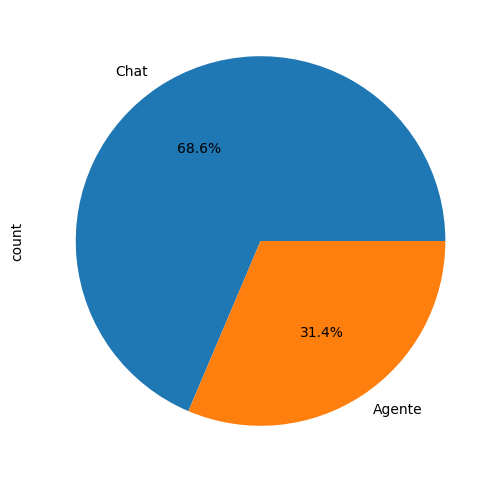

In [13]:
# Create the table
tipo_resolucion_counts = df['Tipo de resolución'].value_counts()
tipo_resolucion_proportions = tipo_resolucion_counts / tipo_resolucion_counts.sum()
data = {
    'Tipo de Resolución': tipo_resolucion_counts.index.tolist() + ['Total'],
    'Frecuencia': tipo_resolucion_counts.values.tolist() + [tipo_resolucion_counts.sum()],
    'Proporción': tipo_resolucion_proportions.values.tolist() + [tipo_resolucion_proportions.sum()]
}
table = pd.DataFrame(data)

# Display the table
print(table)

# Visualiza la distribución con un gráfico de pie
tipo_resolucion_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

# Conclusiones análisis univariado

## Distribución de la Resolución de Chats:

68.6% de las consultas fueron resueltas completamente por el bot.

31.4% de las interacciones necesitaron la intervención de un agente humano.

Esto indica que el bot está manejando más de dos tercios de las consultas sin necesidad de escalamiento, es decir, que es un modelo desbalanceado por naturaleza.

## Implicaciones del análisis:

El bot es funcional, pero aún hay una cantidad significativa de usuarios (31.4%) que necesitan un agente.

Si el objetivo es reducir la carga en los agentes humanos, habría que analizar qué tipo de consultas son más difíciles para el bot, sin embargo, para este modelo no es posible extraer la razón de la consulta del usuario por lo tanto se va a análizar de acuerdo al tipo de usuario y fecha.



# Análisis Bivariado

## Selección de variables

Se realizará la prueba Chi2 para determinar que variables tienen mayor dependencia con el Tipo de resolución

In [16]:
from scipy.stats import chi2_contingency

# Seleccionar variables categóricas para evaluar su relación con "Tipo de Resolución"
categorical_vars = ["Canal", "Dispositivo", "Media", "Audiencia"]

# Calcular Chi² para cada variable categórica
chi2_results = {}
for var in categorical_vars:
    tabla = pd.crosstab(df[var], df["Tipo de resolución"])
    chi2, p, dof, expected = chi2_contingency(tabla)
    chi2_results[var] = {"Chi2": chi2, "p-valor": p}

# Convertir resultados a un DataFrame
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index')

# Mostrar resultados
print(chi2_df) #Print the dataframe using the built-in print function

# Evaluar relación correlación entre Fecha y Tipo de Resolución
fecha_resolucion = pd.crosstab(df["Fecha"].dt.date, df["Tipo de resolución"])
chi2_fecha, p_fecha, dof_fecha, expected_fecha = chi2_contingency(fecha_resolucion)
print(f"Chi2 para Fecha: Chi2 = {chi2_fecha}, p-valor = {p_fecha}")

                    Chi2        p-valor
Canal          44.748484   1.046450e-09
Dispositivo  1064.217529  8.092818e-232
Media        1156.486708  3.908009e-238
Audiencia    3841.846570   0.000000e+00
Chi2 para Fecha: Chi2 = 4120.651378002076, p-valor = 0.0


## Las variables que se escogerán para el análisis Bivariado serán: **Tipo de resolución** y **Audiencia**, ya que aunque todas las variables tienen incidencia sobre si un usuario va a requerir contactarse con un agente, La Audiencia es la que presenta un Chi2 más elevado, sugiriendo que es la variable más relevante.

## Razones para seleccionar estas variables:
1. Cada tipo de usuario puede tener necesidades distintas. Un aspirante podría hacer preguntas diferentes a las de un profesor.

  ¿Algunos tipos de usuarios necesitan más ayuda humana que otros?
2. Optimización del servicio de atención

  Si ciertos grupos (ej. profesores o colaboradores) requieren más agentes, se pueden diseñar respuestas automáticas específicas para mejorar la eficiencia del bot.

  ¿El bot resuelve bien consultas de estudiantes pero falla con profesores?
3. Identificación de mejoras en el bot

  Si un grupo específico de usuarios solicita más agentes, se pueden detectar patrones en las consultas que ese grupo realiza.

  ¿Qué ajustes en el bot pueden mejorar su tasa de resolución para cada tipo de usuario?

In [17]:
# Tabla de contingencia Audiencia vs Tipo de Resolución

# Group data by 'Audiencia' and 'Tipo de resolución', then count occurrences
resolution_by_audience = df.groupby(['Audiencia', 'Tipo de resolución']).size().unstack(fill_value=0)

# Calculate the proportion of each resolution type for each audience
resolution_by_audience['Total'] = resolution_by_audience.sum(axis=1)
resolution_by_audience['Proporción Agente'] = resolution_by_audience['Agente'] / resolution_by_audience['Total']

# Sort the table by the proportion of 'Agente' resolution in descending order
resolution_by_audience = resolution_by_audience.sort_values('Proporción Agente', ascending=False)

print("Tabla de contingencia Audiencia vs Tipo de Resolución")
# Display the table
resolution_by_audience


Tabla de contingencia Audiencia vs Tipo de Resolución


Tipo de resolución,Agente,Chat,Total,Proporción Agente
Audiencia,,,,
profesor,1423,1430,2853,0.498773
colaborador,643,687,1330,0.483459
estudiante,7099,10764,17863,0.397414
graduado,910,1420,2330,0.390558
Sin identificar,240,1417,1657,0.144840
aspirante,710,8386,9096,0.078056


Chi2: 3846.0375678001474, p-valor: 0.0
Existe una relación significativa entre Tipo de Audiencia y Resolución.


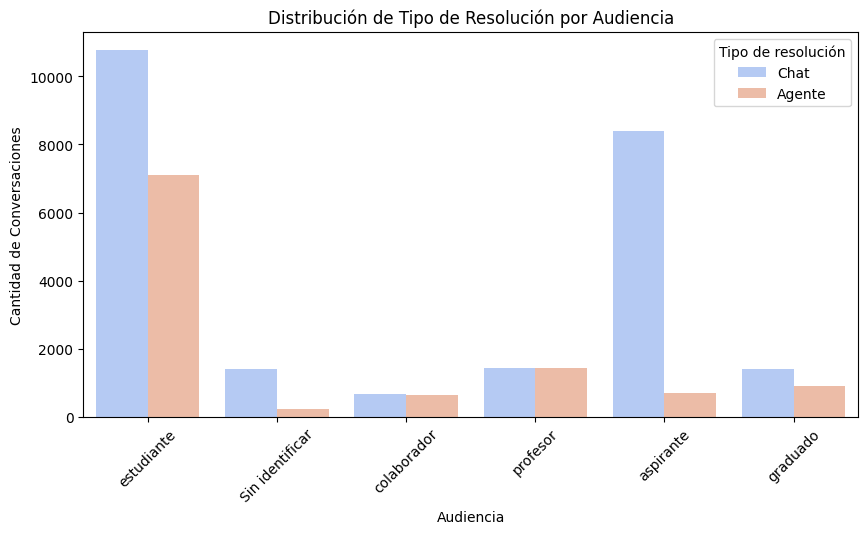

In [18]:
# Aplicar test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(resolution_by_audience)
print(f"Chi2: {chi2}, p-valor: {p}")

# Interpretación
if p < 0.05:
    print("Existe una relación significativa entre Tipo de Audiencia y Resolución.")
else:
    print("No hay evidencia suficiente para afirmar que existe una relación entre las variables.")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x=df["Audiencia"], hue=df["Tipo de resolución"], palette="coolwarm")
plt.title("Distribución de Tipo de Resolución por Audiencia")
plt.xlabel("Audiencia")
plt.ylabel("Cantidad de Conversaciones")
plt.xticks(rotation=45)
plt.show()

# Interpretación

En este caso, un Chi2 de 3846.04 es un valor grande, lo que sugiere que la relación entre Tipo de Audiencia y Resolución es significativa. Por otro lado, el p-valor es 0.0, lo que indica que es prácticamente imposible que esta relación ocurra por azar.

Las poblaciones que hacen un mayor uso del bot son los Estudiante y Aspirantes, replresentando un 82% de todas las consultas con el Bot y el 71% de las consultas a Agentes. Sin embargo, de estas consultas con agentes la mayoría corresponden a consultas de estudiantes, por lo que podemos afirmar que es la población que requiere más soporte con un humano y por lo tanto el bot no resuelve sus consultas eficientemente.

Por otro lado, los profesores y colaboradores que inician una conversación con el Bot necesitan ayuda humana la mitad de las veces, por lo tanto tampoco se resuelve efectivamente sus consultas.

Los resultado obtenido hacen sentido con la naturaleza del negocio, ya que las poblaciones más grandes son los estudiantes, los cuales tienen contacto con muchos servicios de Siry, sobre todo con Banner, y en dentro de sus actividades pueden requerir soporte en muchas actividades puntuales de cada sistema de información que utilizan. También hace sentido que los colaboradores y docentes solicitten en mayor medida el tipo e solicitudes que requiere esta población no son respuestas de soporte inmediato o de solicitud de información en un portal web, si no que requieren subir casos al Sistema de gestión de solicitudes (SGS) y para hacer la apertura de los casos prefieren utilizar la guía humana.

Además, se puede inferir que los estudiantes y aspirantes usan más el chatbot y menos el contacto humano al ser una población más familiarizada con la tecnología.

Por último, la interpretación de la relación entre la Audiencia y el Tipo de resolución es un resultado parcial, ya que esta relación contiene información implicita que no esta pudiendo ser tenida en cuenta en este analisis por la forma en que se recolecta la data, y es el servicio por el cual el usuario inicia una conversación con el chat.

#Conclusiones

1. La relación entre "Tipo de Audiencia" y "Resolución" es estadísticamente significativa

  El Chi² elevado (3846.04) y p-valor de 0.0 confirman que el tipo de usuario influye directamente en si una consulta es resuelta por el bot o escalada a un agente.

2.  Los estudiantes son la audiencia que más interactúa con el bot y con agentes

  Representan la mayoría de las consultas tanto en el bot (82%) como en la interacción con agentes (71%). Esto indica que, aunque usan el bot con frecuencia, también tienen muchas consultas que el bot no logra resolver, lo que aumenta la carga en los agentes.

3.  Los profesores y colaboradores requieren agentes en casi la mitad de sus interacciones

  Es posible que sus solicitudes sean más administrativas o complejas, lo que exige interacción humana (ej. gestión de casos en SGS).

4.  El uso del bot y del soporte humano está alineado con el comportamiento esperado según la naturaleza del negocio

  Los estudiantes requieren soporte en múltiples sistemas, por lo que su carga de consultas es alta.
  
  Los colaboradores y profesores necesitan un enfoque distinto, ya que sus consultas pueden no resolverse solo con información automatizada.
  
  Los aspirantes usan más el bot, posiblemente porque buscan información puntual y sencilla sobre admisiones.

5. El análisis actual es parcial, ya que no se está considerando el "Servicio" asociado a la consulta

  No sabemos qué tipo de preguntas están generando la necesidad de un agente. El servicio al que está asociada la consulta (ej. Banner, SGS, Matrículas) podría ser clave para entender por qué ciertos usuarios necesitan más soporte humano.


# Próximos pasos

##1. Evaluar el nivel de eficiencia del bot en diferentes tipos de audiencia

##2. Analizar qué intenciones de búsqueda generan más interacción con agentes

##3. Analizar la incidencia de la fecha en la recepción de solicitudes al chat

# Modelo de datos para predecir cantidad de usuarios que solicitarán atención con un agente en los próximos 30 días

Precisión del modelo Random Forest (todas las variables): 0.76
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4939
           1       0.60      0.62      0.61      2087

    accuracy                           0.76      7026
   macro avg       0.72      0.72      0.72      7026
weighted avg       0.77      0.76      0.76      7026



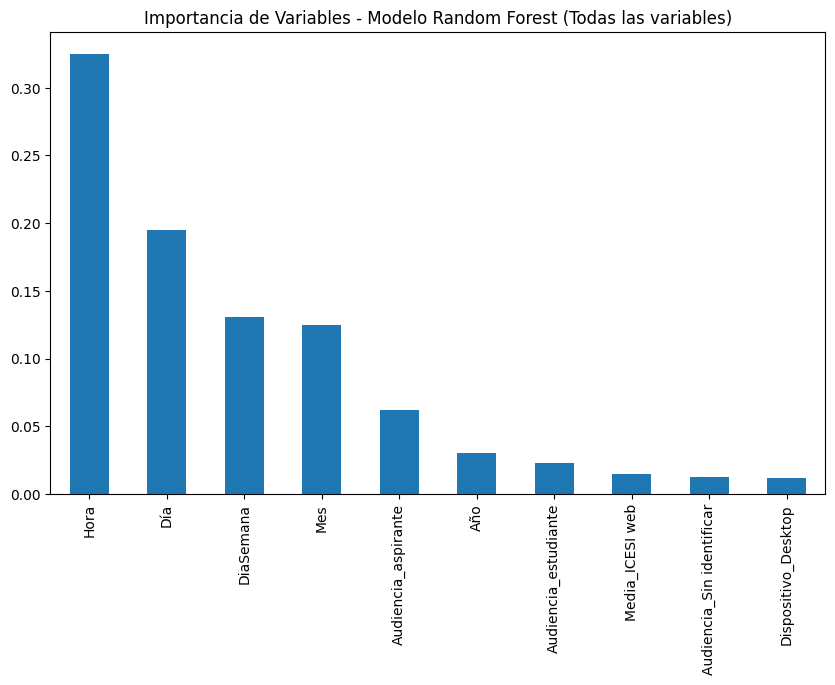

Precisión del modelo Random Forest (fecha y audiencia): 0.75
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      4939
           1       0.57      0.64      0.60      2087

    accuracy                           0.75      7026
   macro avg       0.70      0.72      0.71      7026
weighted avg       0.76      0.75      0.75      7026



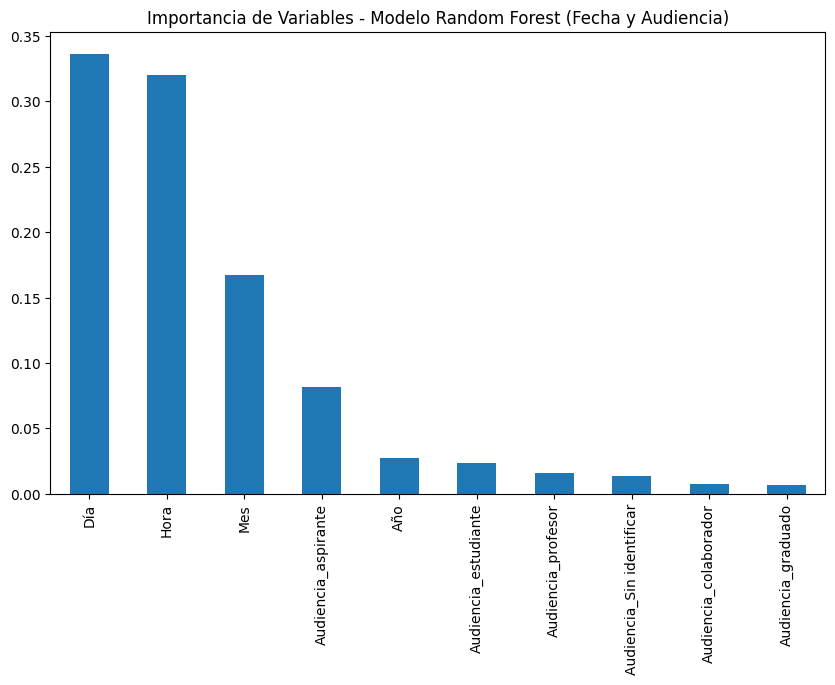

Usuarios que solicitarán agente en los próximos 30 días (Random Forest - todas las variables): 5
Usuarios que solicitarán agente en los próximos 30 días (Random Forest - fecha y audiencia): 8


In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from datetime import datetime

# Crear nuevas características a partir de la fecha
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df['Hora'] = df['Fecha'].dt.hour.astype(int)  # Asegurar que es entero

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['Canal', 'Media', 'Dispositivo', 'Audiencia'])

# Definir variable objetivo (1 si solicitó agente, 0 si no)
df['Solicita_Agente'] = df['Tipo de resolución'].apply(lambda x: 1 if x == 'Agente' else 0)

# Modelo 1: Random Forest (Todas las variables)
X1 = df.drop(columns=['Fecha', 'Tipo de resolución', 'Solicita_Agente'])
y = df['Solicita_Agente']
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
modelo_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf1.fit(X_train1, y_train)
y_pred1 = modelo_rf1.predict(X_test1)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Precisión del modelo Random Forest (todas las variables): {accuracy1:.2f}')
print(classification_report(y_test, y_pred1))

# Importancia de variables para Modelo 1
importancia_vars1 = pd.Series(modelo_rf1.feature_importances_, index=X1.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importancia_vars1[:10].plot(kind='bar')
plt.title('Importancia de Variables - Modelo Random Forest (Todas las variables)')
plt.show()

# Modelo 2: Random Forest (Solo Año, Mes, Día, Hora y Audiencia)
X2 = df[['Año', 'Mes', 'Día', 'Hora'] + [col for col in df.columns if col.startswith('Audiencia_')]]
X_train2, X_test2, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)
modelo_rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf2.fit(X_train2, y_train)
y_pred2 = modelo_rf2.predict(X_test2)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Precisión del modelo Random Forest (fecha y audiencia): {accuracy2:.2f}')
print(classification_report(y_test, y_pred2))

# Importancia de variables para Modelo 2
importancia_vars2 = pd.Series(modelo_rf2.feature_importances_, index=X2.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importancia_vars2.plot(kind='bar')
plt.title('Importancia de Variables - Modelo Random Forest (Fecha y Audiencia)')
plt.show()

# Predicción para los próximos 30 días con ambos modelos
ultimos_datos1 = df[df['Fecha'] >= df['Fecha'].max() - pd.DateOffset(days=30)]
predicciones_rf1 = modelo_rf1.predict(ultimos_datos1.drop(columns=['Fecha', 'Tipo de resolución', 'Solicita_Agente'], errors='ignore'))
print(f'Usuarios que solicitarán agente en los próximos 30 días (Random Forest - todas las variables): {sum(predicciones_rf1)}')

ultimos_datos2 = ultimos_datos1[['Año', 'Mes', 'Día', 'Hora'] + [col for col in df.columns if col.startswith('Audiencia_')]]
predicciones_rf2 = modelo_rf2.predict(ultimos_datos2)
print(f'Usuarios que solicitarán agente en los próximos 30 días (Random Forest - fecha y audiencia): {sum(predicciones_rf2)}')


In [56]:
# Predicción para los próximos 30 días
ultimos_datos = df[df['Fecha'] >= df['Fecha'].max() - pd.DateOffset(days=30)]
predicciones = modelo.predict(ultimos_datos.drop(columns=['Fecha', 'Tipo de resolución', 'Solicita_Agente']))
print(f'Usuarios que solicitarán agente en los próximos 30 días: {sum(predicciones)}')

Usuarios que solicitarán agente en los próximos 30 días: 5
